# Context:

This case is about a bank (Thera Bank) whose management wants to explore ways of 
converting its liability customers to personal loan customers (while retaining them as 
depositors). A campaign that the bank ran last year for liability customers showed a 
healthy conversion rate of over 9% success. This has encouraged the retail marketing 
department to devise campaigns with better target marketing to increase the success 
ratio with minimal budget.

# Attribute Information:


1. ID : Customer ID

2. Age : Customer's age in completed years

3. Experience : #years of professional experience

4. Income : Annual income of the customer ($000)

5. ZIP Code : Home Address ZIP code.

6. Family : Family size of the customer

7. CCAvg : Avg. spending on credit cards per month ($000)

8. Education : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

9. Mortgage : Value of house mortgage if any. ($000)

10. Personal Loan : Did this customer accept the personal loan offered in the last campaign?

11. Securities Account : Does the customer have a securities account with the bank?

12. CD Account : Does the customer have a certificate of deposit (CD) account with the bank?

13. Online : Does the customer use internet banking facilities?

14. Credit card : Does the customer use a credit card issued by UniversalBank?


# Objective:

The classification goal is to predict the likelihood of a liability customer buying personal 
loans.

# Steps and tasks:

## 1. Read the column description and ensure you understand each attribute well

In [55]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
# Importing Data file
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 546.9 KB


In [57]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [58]:
df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [59]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [60]:
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


# 2. Study the data distribution in each attribute, share your findings

In [61]:
df.drop('ZIP Code',axis = 1,inplace =True)
df.drop('ID',axis = 1,inplace =True)

In [62]:
df['Income / Person'] = ((df ['Income']*1000/ 12))/ df['Family']

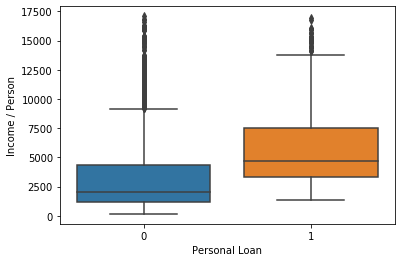

In [63]:
sns.boxplot(x= 'Personal Loan',y = 'Income / Person',data = df)

A crude observation shows that customers of a higher income level are more likely to take the personal loan rather than that of a lower income level.

However,further investigation into the same is to be done for a better classification model

In [64]:
pd.crosstab(df['Personal Loan'],df['Education'],normalize = 'index')

Education,1,2,3
Personal Loan,,,
0,0.443142,0.270133,0.286726
1,0.193750,0.379167,0.427083


In [65]:
pd.crosstab(df['Personal Loan'],df['Education'],margins =True)

Education,1,2,3,All
Personal Loan,,,,
0,2003,1221,1296,4520
1,93,182,205,480
All,2096,1403,1501,5000


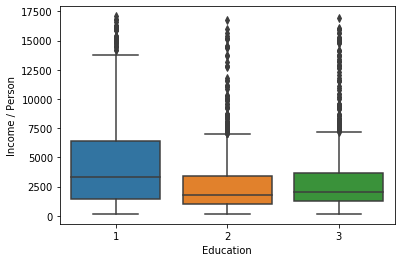

In [66]:
sns.boxplot(x= 'Education',y = 'Income / Person',data = df)

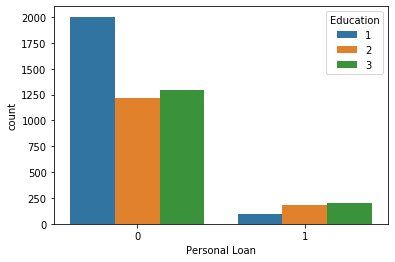

In [67]:
sns.countplot(x='Personal Loan',hue='Education',data = df)

The Customer with Graduate and Advanced/Professional qualification are more likely to take a loan inspite of lower income level rather than that of Undergraduates who are a higher median income level

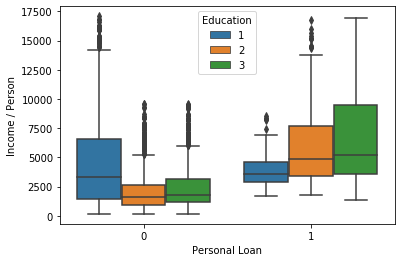

In [68]:
sns.boxplot(x= 'Personal Loan',y = 'Income / Person',hue = 'Education',data = df)

In [69]:
df.groupby(['Education']).describe()['Income / Person']

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
1,2096.0,4464.794052,3808.975738,166.666667,1472.222222,3333.333333,6427.083333,17083.333333
2,1403.0,2665.478736,2525.443853,166.666667,1020.833333,1750.000000,3416.666667,16750.000000
3,1501.0,3040.579429,2773.112704,166.666667,1312.500000,2041.666667,3666.666667,16916.666667


The customers with a Higher Income among that with Graduate and Advanced/Professional Qualification is more likely to take the personal loan.However, Customers with around Median Income range or slightly higher among that with Undergraduate Qualification is more likely to take the personal Loan.The values shown in the box plot against customers with Undergraduate Qualification who received the loan and the Median Income Range for Undergraduate Customer clearly coincides unlike the other 2 groups


In [70]:
pd.crosstab(df['Personal Loan'],df['CD Account'],normalize = 'index')

CD Account,0,1
Personal Loan,,
0,0.964159,0.035841
1,0.708333,0.291667


In [71]:
pd.crosstab(df['Personal Loan'],df['CD Account'],margins = True)

CD Account,0,1,All
Personal Loan,,,
0,4358,162,4520
1,340,140,480
All,4698,302,5000


Nearly half of the customer who has a CD Account accepted the personal loan,which is less than a tenth in case of customers which do not have a CD Account

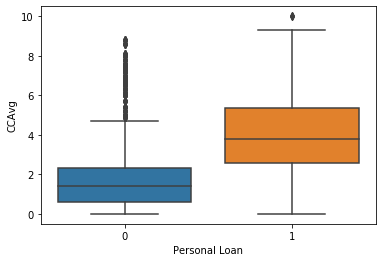

In [72]:
sns.boxplot(x= 'Personal Loan',y = 'CCAvg',data = df)

Customers with higher spendings on Credit Cards are more likely to take the Personal Loan 

In [73]:

df['Mortgage Status'] = df.apply(lambda x: 1 if x.Mortgage>0 else 0,axis=1 )
df_Mortgage = df[df['Mortgage Status'] == 1]
df_no_Mortgage = df[df['Mortgage Status'] == 0]


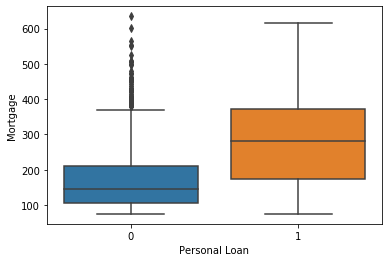

In [74]:
sns.boxplot(x= 'Personal Loan',y = 'Mortgage',data = df_Mortgage)

Among customers with a Mortgage,Customers with a higher Mortgage are likely to take the Personal Loan

# 3. Get the target column distribution. Your comments

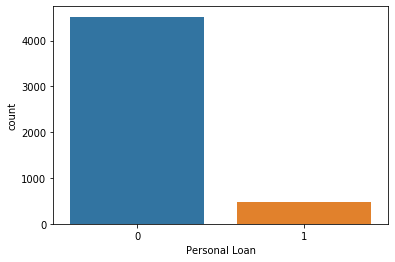

In [75]:
sns.countplot(x='Personal Loan',data=df)

The dataset is imbalanced with a vast majority of the items in Class 0 (rejects the Personal Loan offer) and a small fraction(almost a tenth) in Class 1 (accepts the Personal Loan offer).The correct counts may be retrieved from margins in the previous comparisons

In [76]:
df.drop('Mortgage Status',axis = 1, inplace = True)

In [77]:
#Use label encoder to convert categorical variables to one-hot encoding (dummy variables)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])
df['Personal Loan'] = le.fit_transform(df['Personal Loan'])
df['Securities Account'] = le.fit_transform(df['Securities Account'])
df['CD Account'] = le.fit_transform(df['CD Account'])
df['Online'] = le.fit_transform(df['Online'])
df['CreditCard'] = le.fit_transform(df['CreditCard'])

In [78]:
x = df.drop(labels = 'Personal Loan' , axis =1)
y = df['Personal Loan']

In [79]:
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size =0.30,random_state =1)

# My understanding

In this case,the False Negitives (Type 2 error) is costlier rather than the False Positives (Type 1 error) as the False Negitives are the customers were excluded from the target population by the model,but was in need of the Personal Loan that was offered by the Bank.This is a loss in opportunity as approaching them would have led to more profits in form of interest from these loans for the Bank.

The cost of contacting the customer by the retail manufacturing department is very small compared to the cost of loss in opportunity.A large Type 2 error can only contribute to a higher telephone cost and a few annoyed customers whose attitude can be changed by other means like better schemes.

Therefore it is better to use a Machine Learning Model with higher recall which is indicator of the type 2 error would be a best parameter to judge the Machine Learning Model compared to the rest.

# 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans


# 6. Print the confusion matrix for all the above models 

# Before Standardization of Data / Proper Scaling

## a.Logistic regression

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)

y_predict = model.predict(x_test)



In [81]:
model.score(x_train,y_train)

0.9525714285714286

In [82]:
model.score(x_test, y_test)

0.9466666666666667

In [83]:
cols = x_train.columns
coef_df = pd.DataFrame(model.coef_,columns =cols)
coef_df['intercept'] = model.intercept_
coef_df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Income / Person,intercept
0,-0.363098,0.36284,0.059746,0.157801,0.160394,1.76646,0.000645,-0.900315,3.326726,-0.572812,-1.00033,-0.000217,-0.793031


In [84]:
from sklearn import metrics

print('Model Accuracy on Test Data :',metrics.accuracy_score(y_test , y_predict))

print('Model Recall on Test Data :',metrics.recall_score(y_test , y_predict))

print('Model Precision on Test Data:',metrics.precision_score(y_test , y_predict))

print('Model f1 score on Test Data:',metrics.f1_score(y_test , y_predict))

Model Accuracy on Test Data : 0.9466666666666667
Model Recall on Test Data : 0.5637583892617449
Model Precision on Test Data: 0.8484848484848485
Model f1 score on Test Data: 0.6774193548387096


In [85]:
from sklearn import metrics

cm_lr = metrics.confusion_matrix (y_test,y_predict, labels =[1, 0] )

df_cm_lr = pd.DataFrame(cm_lr , index = [1,0] ,columns = ['Predict 1', 'Predict 0' ])
df_cm_lr


,Predict 1,Predict 0
1,84,65
0,15,1336


This Machine Learning Model perform quite well with our test data.The model identifies 56.37% of our target customers for the personal loan correctly.Although we would be losing on the rest 44% of the customers the majority of the customers have been identified with significantly small error of wrongly identifying 15 out of 1341 Customers.

The advantage of logistic regression is that we can obtain the influence rendered by each of the feature columns to the model we have prepared.The parameter that whether the customer has a certificate of deposit (CD)account with the bank and the Educational Qualifications of the customer tend to influence the classification Model.

I feel that the error in Logistic Regression Machine Learning Model has arose from the fact that we assume that the data is linearily separable which is not the case in the real world.

## b.Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB

naive_model = GaussianNB()

naive_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [35]:
naive_train_predict = naive_model.predict(x_train)

from sklearn import metrics

print('Model Accuracy on Train Data:',metrics.accuracy_score(y_train , naive_train_predict))

print('Model Recall on Train Data:',metrics.recall_score(y_train , naive_train_predict))

print('Model Precision on Train Data:',metrics.precision_score(y_train , naive_train_predict))

print('Model f1 score on Train Data:',metrics.f1_score(y_train , naive_train_predict))

Model Accuracy on Train Data: 0.8862857142857142
Model Recall on Train Data: 0.6283987915407855
Model Precision on Train Data: 0.4306418219461698
Model f1 score on Train Data: 0.5110565110565111


In [36]:
naive_test_predict = naive_model.predict(x_test)

from sklearn import metrics

print('Model Accuracy on Test Data :',metrics.accuracy_score(y_test , naive_test_predict))

print('Model Recall on Test Data :',metrics.recall_score(y_test , naive_test_predict))

print('Model Precision on Test Data:',metrics.precision_score(y_test , naive_test_predict))

print('Model f1 score on Test Data:',metrics.f1_score(y_test , naive_test_predict))

Model Accuracy on Test Data : 0.874
Model Recall on Test Data : 0.6040268456375839
Model Precision on Test Data: 0.4090909090909091
Model f1 score on Test Data: 0.4878048780487805


In [37]:
cm_nb = metrics.confusion_matrix (y_test,naive_test_predict, labels =[1, 0] )

df_cm_nb = pd.DataFrame(cm_nb , index = [1,0] ,columns = ['Predict 1', 'Predict 0' ])
df_cm_nb


,Predict 1,Predict 0
1,90,59
0,130,1221


The Machine Learning Model performs satisfactorily on our test data.Even with the least accuracy among other models,it performs the best in the recall score by identifying 60.4% of the target customers which is more important in terms of serving the purpose for which the model is built.Although,it  has a relatively higher error and wrongly identifying 130 of 1351 customers.Although you have a bunch of annoyed customers.This does not pose a threat as the loyalty of these customers can be regained by other means and it is highly unlikely that customers would switch between banks for this reason.

The Naive Bayes Classifier is sucessfully in segregating the data points into 2 Classes with exception of a relatively high noise which has led to the low accuracy score compared to the other Machine Learning Models.In spite of the low accuracy,this Model serves our purpose to a large extent.The low accuracy is mainly due to the imbalance in datasets that has led to wrongly classifying the items.

I feel that this is because the Naive Bayes Classifier is not sensitive to irreleavant features and it ability in handling real and discrete data well.

# c.KNN

In [38]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

# instantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors = 7)

# fitting the model
knn.fit(x_train, y_train)

# predict the response
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

# evaluate accuracy

print('Accuracy Score on Train data: ',accuracy_score(y_train, y_pred_train))
print('Recall Score on Train Data: ',recall_score(y_train, y_pred_train))
print('Precision Score on Train Data:',precision_score(y_train, y_pred_train))
print('f1 Score on Train Data:',precision_score(y_train, y_pred_train))

print('\n')


print('Accuracy Score on Test data: ',accuracy_score(y_test, y_pred_test))
print('Recall Score on Test Data: ',recall_score(y_test, y_pred_test))
print('Precision Score on Test Data:',precision_score(y_test, y_pred_test))
print('f1 Score on Test Data:',f1_score(y_test, y_pred_test))


Accuracy Score on Train data:  0.9382857142857143
Recall Score on Train Data:  0.3776435045317221
Precision Score on Train Data: 0.9259259259259259
f1 Score on Train Data: 0.9259259259259259


Accuracy Score on Test data:  0.9253333333333333
Recall Score on Test Data:  0.28859060402684567
Precision Score on Test Data: 0.8775510204081632
f1 Score on Test Data: 0.43434343434343436


In [39]:
cm_knn = metrics.confusion_matrix (y_test,y_pred_test, labels =[1, 0] )

df_cm_knn = pd.DataFrame(cm_knn , index = [1,0] ,columns = ['Predict 1', 'Predict 0' ])
df_cm_knn

,Predict 1,Predict 0
1,43,106
0,6,1345


Although the K-Nearest Neighbors has a high accuracy on our test data.The Recall of the Model is very low compared to other model and therefore is not the right model to be used in this case.
Since as per the confusion matrix,the model identifies 28.85% of the target customers and thus we would be losing on major chunk ie. 71% (1-Recall) of the potential Personal Loan Customers .Although we would correctly identify who not to be disturb by just disturbing just 6 out of the 1341 customers who do not want a loan,it does not adequately serve the purpose for which the model is built.

I feel that the inefficiency of the KNN machine learning model to perform is due to the  imbalanced data set.Here only 9% of the data points is classified under Class 1 (ie. accepts the personal loan offer) and hence Class 1 often gets misclassified as a majority of the points belong to Class 0 (ie. rejects the personal loan offer) as a large majority of data point around Class 1 points will be Class O data points.We presume that this problem can be solved to some extent by Scaling of the points which may make the algorithm perform better by a better seggregation of data points.

I also feel that the large number of data points and input variable has led to the loss of eeficiency of the KNN Machine learning model which is a common disadvantage of KNN

# After Standardization of data by Proper Scaling

In [40]:
#standardization of data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

X_std = pd.DataFrame(StandardScaler().fit_transform(df))
X_std.columns = df.columns
X_std.drop(labels = 'Personal Loan',axis = 1,inplace =True)

In [41]:
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_std, y , test_size =0.30,random_state =1)

## a.Logistic regression

In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)

y_predict = model.predict(x_test)



In [43]:
model.score(x_test, y_test)

0.9493333333333334

In [44]:
cols = x_train.columns
coef_df = pd.DataFrame(model.coef_,columns =cols)
coef_df['intercept'] = model.intercept_
coef_df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Income / Person,intercept
0,-0.190191,0.246987,2.660527,0.330267,0.285173,1.380605,0.065461,-0.336793,0.878647,-0.289635,-0.518231,-0.566757,-4.542963


In [45]:
from sklearn import metrics

print('Model Accuracy on Test Data :',metrics.accuracy_score(y_test , y_predict))

print('Model Recall on Test Data :',metrics.recall_score(y_test , y_predict))

print('Model Precision on Test Data:',metrics.precision_score(y_test , y_predict))

print('Model f1 score on Test Data:',metrics.f1_score(y_test , y_predict))

Model Accuracy on Test Data : 0.9493333333333334
Model Recall on Test Data : 0.5906040268456376
Model Precision on Test Data: 0.8543689320388349
Model f1 score on Test Data: 0.6984126984126984


In [46]:
from sklearn import metrics

cm_lr = metrics.confusion_matrix (y_test,y_predict, labels =[1, 0] )

df_cm_lr = pd.DataFrame(cm_lr , index = [1,0] ,columns = ['Predict 1', 'Predict 0' ])
df_cm_lr


,Predict 1,Predict 0
1,88,61
0,15,1336


Even though we have scaled the data,there is only a slight increase in the recall score and therefore the required recall value (ie.56.3 % to 59 %) and marginal in the accuracy.

This increase in recall score  has led to Logistic Regression posing a steep competition to the Naive Bayes Model without Scaling.

This is because when the parameters with a larger range is given a lower coeffcient in the logistic regression to take up for the need for scaling which may be important in the preprocessing stage for other models.

In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree = 2, interaction_only  =True) # only x1x2 or x2x3 etc. from interaction_only
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(x_train2, y_train)

y_pred = poly_clf.predict(x_test2)

print(poly_clf.score(x_train2,y_train))

0.608667831947408


## b.Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB

naive_model = GaussianNB()

naive_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [49]:
naive_train_predict = naive_model.predict(x_train)

from sklearn import metrics

print('Model Accuracy on Train Data :',metrics.accuracy_score(y_train , naive_train_predict))

print('Model Recall on Train Data :',metrics.recall_score(y_train , naive_train_predict))

print('Model Precision on Train Data:',metrics.precision_score(y_train , naive_train_predict))

print('Model f1 score on Train Data:',metrics.f1_score(y_train , naive_train_predict))

Model Accuracy on Train Data : 0.8791428571428571
Model Recall on Train Data : 0.6253776435045317
Model Precision on Train Data: 0.4090909090909091
Model f1 score on Train Data: 0.49462365591397844


In [50]:
naive_test_predict = naive_model.predict(x_test)

from sklearn import metrics

print('Model Accuracy on Test Data :',metrics.accuracy_score(y_test , naive_test_predict))

print('Model Recall on Test Data :',metrics.recall_score(y_test , naive_test_predict))

print('Model Precision on Test Data:',metrics.precision_score(y_test , naive_test_predict))

print('Model f1 score on Test Data:',metrics.f1_score(y_test , naive_test_predict))

Model Accuracy on Test Data : 0.868
Model Recall on Test Data : 0.5973154362416108
Model Precision on Test Data: 0.3920704845814978
Model f1 score on Test Data: 0.4734042553191489


In [51]:
cm_nb = metrics.confusion_matrix (y_test,naive_test_predict, labels =[1, 0] )

df_cm_nb = pd.DataFrame(cm_nb , index = [1,0] ,columns = ['Predict 1', 'Predict 0' ])
df_cm_nb


,Predict 1,Predict 0
1,89,60
0,138,1213


It is seen that there is a fractional decrease of less than 1%  in the recall score and accuracy.The decrease may be not evident enough for a investigation into the same.

# c.KNN

In [52]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

# instantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors = 7)

# fitting the model
knn.fit(x_train, y_train)

# predict the response
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

# evaluate accuracy

print('Accuracy Score on Train data: ',accuracy_score(y_train, y_pred_train))
print('Recall Score on Train Data: ',recall_score(y_train, y_pred_train))
print('Precision Score on Train Data:',precision_score(y_train, y_pred_train))
print('f1 Score on Train Data:',precision_score(y_train, y_pred_train))

print('\n')


print('Accuracy Score on Test data: ',accuracy_score(y_test, y_pred_test))
print('Recall Score on Test Data: ',recall_score(y_test, y_pred_test))
print('Precision Score on Test Data:',precision_score(y_test, y_pred_test))
print('f1 Score on Test Data:',f1_score(y_test, y_pred_test))


Accuracy Score on Train data:  0.9668571428571429
Recall Score on Train Data:  0.6737160120845922
Precision Score on Train Data: 0.9653679653679653
f1 Score on Train Data: 0.9653679653679653


Accuracy Score on Test data:  0.9466666666666667
Recall Score on Test Data:  0.5234899328859061
Precision Score on Test Data: 0.896551724137931
f1 Score on Test Data: 0.6610169491525425


In [53]:
cm_knn = metrics.confusion_matrix (y_test,y_pred_test, labels =[1, 0] )

df_cm_knn = pd.DataFrame(cm_knn , index = [1,0] ,columns = ['Predict 1', 'Predict 0' ])
df_cm_knn

,Predict 1,Predict 0
1,78,71
0,9,1342


The recall score significantly improves after rescaling with the score almost doubling from 28.85% to 52.34%.This is a significant increase considering the utility of the model in order to achieve our required goals.

The KNN Machine Learning Model tend to give more importance to the independent variables with a larger range,even though it may be less import your the predidtive model because the KNN model tend to look at the closeness of the data to one another.It is observed that noisier the data,the more important is scaling for KNN.

But even after this significant increase in the recall score,KNN still remains the machine learning model that performs the worst in terms of achieve the goals of the machine learning model

# 7. Give your reasoning on which is the best model in this case and why it performs better?

A some information regarding how the business operates would be good when we are analysing the question about machine learning model that best fits our case.It has to do with the weighing of cost of loss of an opportunity to that of operating the telephone marketing business or using the same to perform better productive tasks to aid to the efficacy of the employee.

The Naive Bayes model sucessfully predicts 90 of the target customer for Personal Loan, but in the course of doing the same it incorrectly classifies 130 Customers as target customers.On the other hand,the Logistic Regression model predicts 88 of the target customers with a margin error of wrongly classifying 15 of the customers as target customers.

Some insight into the operation of the business would prove fruitful in weighing the loss of opportunity of 2 target customers to that of human resource,time and money wasted in 130 wrongly classified target customers.

From a layman point of view,I would conclude that the logistic regression model with scaling is the best model to approach the problem of identifying target customers for the Personal Loan instead of using the manpower and resource to gain 2 more customers.As the same manpower can be poduuctively used for better tasks.

The Logistic Regression with Scaling generally perform good large sample sizes where the dependent variable is binary as the one which we have now where the KNN model lags in performing without proper scaling.The Naive Bayes Classifier performs well but it fails to filter the noise which has led to a marginal decrease in accuracy and the wrongly classifying the same in the case of datasets that are highly skewed and this has led to wrongly classifying the items inspite of high recall scores.